## Perguntas a serem respondidas

1. Descobrir o quanto o tema é conhecido e de qual forma se obteve conhecimento sobre
2. Descobrir qual o numero de pessoas que aplicam acessibilidade e quantas gostariam de aplicar
3. Quantas implementam no trabalho e qual a relação disso com o tamanho da empresa
4. Qual a relação entre SO e uso de acessibilidade


In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [118]:
df = pd.read_csv('respostas_formulario.csv')

In [119]:
df.head(2)

,Carimbo de data/hora,Gênero?,Qual a sua área de atuação?,Há quantos anos trabalha com o desenvolvimento de Mobile APPs?,Tem conhecimento sobre desenvolvimento Mobile com funcionalidades voltadas para a acessibilidade em APPs?,Onde você aprendeu sobre acessibilidade?,O quanto você acha que implementa conceitos de acessibilidade nos seus projetos?,"Dos OS listados, marque todos que você considera de fácil implementação de funcionalidades relacionadas a acessibilidade.",Qual a maior dificuldade ao implementar funcionalidades com features de acessibilidade?,Atualmente você trabalha com desenvolvimento Mobile em alguma empresa?,Na empresa em que trabalha são aplicados funcionalidades visando a acessibilidade em APPs?,Qual o tamanho da empresa que você trabalha?
0,26/01/2021 11:20:07,Feminino,Desenvolvedor Mobile,Entre 1 e 3 anos,"Sim, já ouvi falar.",Curso online,2.0,"Android, IOS",Conhecimento técnico,Não,NaN,NaN
1,26/01/2021 11:21:32,Masculino,QA,Entre 3 e 5 anos,"Sim, eu conheço ou já utilizo.",Faculdade,4.0,"Android, IOS",Falta de obrigação nos requisitos do projeto,Sim,Sim,Média


In [120]:
# Alterar os nomes das colunas para ficar mais legível
novos_nomes = {
    "Carimbo de data/hora" : "datetime", 	
    "Gênero?" : "genero", 	
    'Qual a sua área  de atuação?' : "atuacao", 	
    "Há quantos anos trabalha com o desenvolvimento de Mobile APPs? " : "anos_experiencia",
    "Tem conhecimento sobre desenvolvimento Mobile com funcionalidades voltadas para a acessibilidade em APPs?": "conhece_acessibilidade",
    "Onde você aprendeu sobre acessibilidade?" : "aprendeu_em", 	
    "O quanto você acha que implementa conceitos de acessibilidade nos seus projetos?" : "implementa",
    "Dos OS listados, marque todos que você considera de fácil implementação de funcionalidades relacionadas a acessibilidade." : "sistema_operacional",
    "Qual a maior dificuldade ao implementar funcionalidades com features de acessibilidade?": "maior_dificuldade",
    "Atualmente você trabalha com desenvolvimento Mobile em alguma empresa?" : "esta_trabalhando",
    "Na empresa em que trabalha são aplicados funcionalidades visando a acessibilidade em APPs?" : "empresa_implementa",
    "Qual o tamanho da empresa que você trabalha?" : "tamanho_empresa"
}

df = df.rename(columns=novos_nomes)
df.columns

Index(['datetime', 'genero', 'atuacao', 'anos_experiencia',
       'conhece_acessibilidade', 'aprendeu_em', 'implementa',
       'sistema_operacional', 'maior_dificuldade', 'esta_trabalhando',
       'empresa_implementa', 'tamanho_empresa'],
      dtype='object')

## Classificação dos dados



* datetime :  	
* genero 	
* anos_experiencia
* conhece_acessibilidade
* aprendeu_em 	
* implementa
* sistema_operacional
* maior_dificuldade
* esta_trabalhando
* empresa_implementa
* tamanho_empres

In [121]:
df.shape

(44, 12)

## O quanto o tema é conhecido e de qual forma se obteve conhecimento sobre

Os campos que podem trazer essa informação são: genero, atuacao, anos_experiencia, conhece_acessibilidade, aprendeu_em

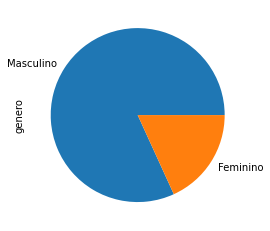

In [122]:
df.genero.value_counts().plot(kind='pie')

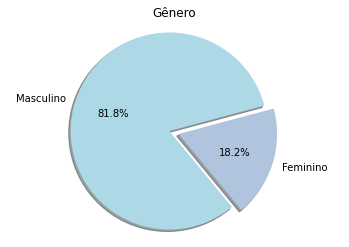

<Figure size 432x288 with 0 Axes>

In [123]:
my_labels = 'Masculino','Feminino'
my_colors = ['lightblue','lightsteelblue']
my_explode = (0, 0.1)
plt.pie(df.genero.value_counts(), labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Gênero')
plt.axis('equal')
plt.show()
plt.savefig('proporcao_genero.png')

In [124]:
df.conhece_acessibilidade.value_counts()

Sim, já ouvi falar.               22
Sim, eu conheço ou já utilizo.    17
Não, nunca ouvi falar.             5
Name: conhece_acessibilidade, dtype: int64

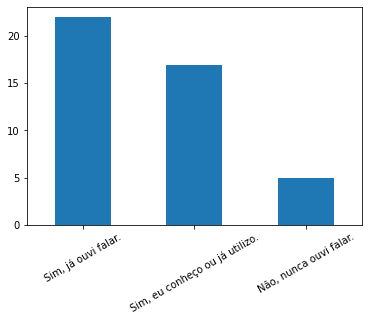

In [125]:
df.conhece_acessibilidade.value_counts().plot(kind='bar')
plt.xticks(rotation=30, horizontalalignment="center")
plt.savefig('conhece_sobre_acessibilidade.png')

Podemos ver que a maioria das pessoas que responderam esse formulário conhece sobre acessibilidade em aplicativos para dispositivos móveis. Dentre as duas classes que conhecem sobre, nós temos o grupo que só ouviu falar como o maior grupo, sendo seguido pelo grupo das pessoas que conhecem e já utilizam.

Dentre essas pessoas, nós gostaríamos de saber de que forma elas conheceram sobre o assunto.

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

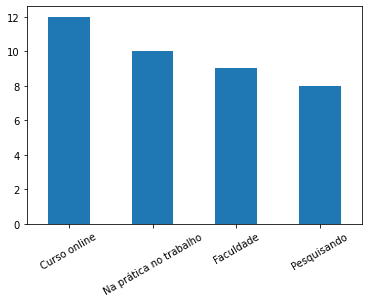

In [126]:
df.aprendeu_em.value_counts().plot(kind='bar')
plt.xticks(rotation=30, horizontalalignment="center")

Com isso podemos perceber que a grande maioria das pessoas que responderam ao nosso formulário aprendeu sobre acessibilidade em Cursos online e em segundo lugar diretamente na prática no trabalho.

## Descobrir qual o numero de pessoas que aplicam acessibilidade e quantas gostariam de aplicar

Das 17 pessoas que já utilizam, como elas classificam a sua implementação.

In [ ]:
df.implementa

In [ ]:
df.plot.scatter(x='length', y='width', c='DarkBlue')

Percebemos que algumas pessoas não responderam e por isso temos valores nulos que não serão contabilizados no nosso cálculo.

Vamos fazer uma tabela de distribuição de frequência para identificar a implementação;

In [215]:
tabela_frequencia = pd.DataFrame(df.implementa.value_counts())
tabela_frequencia = tabela_frequencia.rename(columns={'implementa' : 'fi'})
tabela_frequencia = tabela_frequencia.sort_index()

In [225]:
# frequencia acumulada
fac = []
total = 0
for freq in tabela_frequencia.fi:
  total += freq
  fac.append(total)

total_acumulado = total
tabela_frequencia['fac'] = fac
tabela_frequencia

,fi,fac,xi_x,xi_x_fi
0.0,9,9,4.0,36.0
1.0,6,15,1.0,6.0
2.0,8,23,0.0,0.0
3.0,9,32,1.0,9.0
4.0,6,38,4.0,24.0
5.0,1,39,9.0,9.0


In [227]:
# Calcular a média
rows, _ = tabela_frequencia.shape
somatorio = 0
for index in range (0, rows):
  somatorio += index * tabela_frequencia.iloc[index, 0]

media = somatorio / total_acumulado
media

2.0

In [228]:
# calcular (xi - media)²
xi_x = []

for index in range (0, rows):
  valor = pow((index - media), 2)
  xi_x.append(valor)

tabela_frequencia['xi_x'] = xi_x
tabela_frequencia

,fi,fac,xi_x,xi_x_fi
0.0,9,9,4.0,36.0
1.0,6,15,1.0,6.0
2.0,8,23,0.0,0.0
3.0,9,32,1.0,9.0
4.0,6,38,4.0,24.0
5.0,1,39,9.0,9.0


In [229]:
# calcular (xi - x)² * fi

xi_x_fi = []
xi_x_fi__soma = 0
for index in range (0, rows):
  valor = tabela_frequencia.iloc[index, 0] * tabela_frequencia.iloc[index, 2]
  xi_x_fi.append(valor)
  xi_x_fi__soma += valor

tabela_frequencia['xi_x_fi'] = xi_x_fi
tabela_frequencia

,fi,fac,xi_x,xi_x_fi
0.0,9,9,4.0,36.0
1.0,6,15,1.0,6.0
2.0,8,23,0.0,0.0
3.0,9,32,1.0,9.0
4.0,6,38,4.0,24.0
5.0,1,39,9.0,9.0


In [230]:
xi_x_fi__soma

84.0

In [237]:
variancia = round(xi_x_fi__soma / (total_acumulado - 1), 2)
variancia

2.21

In [240]:
desvio_padrao = round(math.sqrt(variancia), 2)
desvio_padrao

1.49

In [242]:
coeficiente_variacao = (desvio_padrao / media) * 100
coeficiente_variacao

74.5

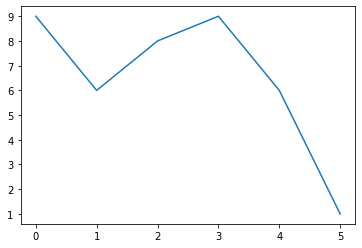

In [250]:
tabela_frequencia.fi.plot.line(x=tabela_frequencia.index, y=tabela_frequencia.fi)

## Quantas implementam no trabalho e qual a relação disso com o tamanho da empresa

(array([], dtype=float64), <a list of 0 Text major ticklabel objects>)

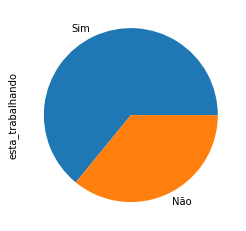

In [157]:
df.esta_trabalhando.value_counts().plot(kind='pie')
plt.xticks(rotation=60, horizontalalignment="center")


In [129]:
df.empresa_implementa.value_counts()

Não    17
Sim     8
Name: empresa_implementa, dtype: int64

In [130]:
empresa_implementa = df.loc[df.empresa_implementa== 'Sim']

In [131]:
empresa_implementa.tamanho_empresa.value_counts()

Grande     3
Média      3
Pequena    2
Name: tamanho_empresa, dtype: int64

## Qual a relação entre SO e uso de acessibilidade

In [ ]:
df.sistema_operacional

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

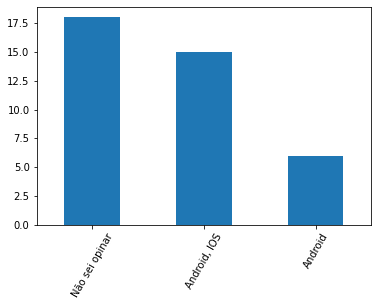

In [137]:
df.sistema_operacional.value_counts().plot(kind='bar')
plt.xticks(rotation=60, horizontalalignment="center")

In [135]:
sistemas_operacionais = pd.Series(df.sistema_operacional.values).dropna().to_frame(name='os')
tps_so = df.sistema_operacional.str.split(",", n = 1, expand = True)

In [151]:
sistemas_operacionais_dict = dict(tps_so[0].value_counts())
sistemas_operacionais_dict.update(tps_so[1].value_counts())

sistemas_operacionais_dict

{' IOS': 15, 'Android': 21, 'Não sei opinar': 18}

(array([0]), <a list of 1 Text major ticklabel objects>)

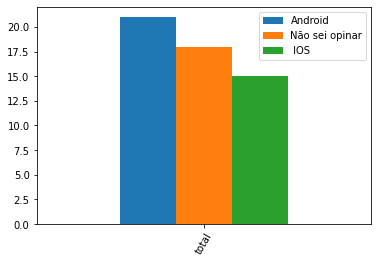

In [156]:
sistemas_operacionais = pd.DataFrame(sistemas_operacionais_dict, index=['total'])
sistemas_operacionais.plot(kind='bar')
plt.xticks(rotation=60, horizontalalignment="center")
